In [1]:
import math
import matplotlib.pyplot as plt
import pymg

dep = 10
N = 2 ** dep
x0 = -1
x1 = 1
dx = (x1 - x0) / N
x = [x0 + i * dx for i in range(N + 1)]
u0 = u1 = 1
u = [u0 + dx * i * (u1 - u0) / (x1 - x0) for i in range(N + 1)]
g = [i ** 6 + 3 * i ** 2 for i in x]
u_sol = [math.exp((x[i] ** 4 - 1) / 4) for i in range(N + 1)]

In [2]:
def nonlin_iter():
    residual = [0] * (N + 1)
    for i in range(1, N):
        residual[i] = g[i] * u[i] - (u[i + 1] + u[i - 1] - 2 * u[i]) / dx / dx
    mg = pymg.Multigrid(dep, 1, x0, x1, 0, 0, residual)
    delta_u = mg.solve()
    for i in range(1, N):
        u[i] += delta_u[i]
    return pymg.norm2res(delta_u)


In [3]:
while 1:
    res = nonlin_iter()
    print(res)
    if res < 1E-10:
        break


0.2269319121774465
0.0464444698357273
0.009230532514817678
0.0018248208349114213
0.0003604356675884392
7.118236735309973e-05
1.4057463279955464e-05
2.7761297562800443e-06
5.482417466449683e-07
1.0826860298120843e-07
2.1380996011463463e-08
4.222763278133128e-09
8.337613892586815e-10
1.6530639735229372e-10
3.4221007365517586e-11


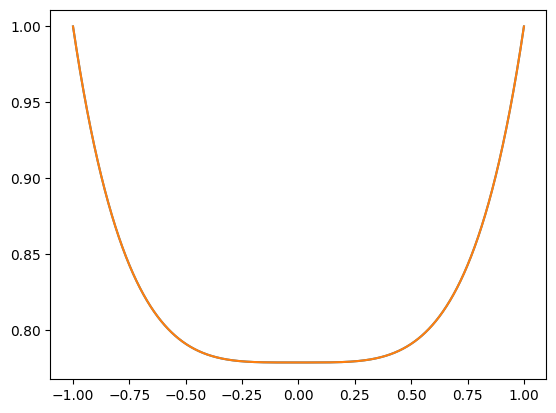

In [4]:
plt.plot(x, u)
plt.plot(x, u_sol)